In [40]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [41]:
def load_data(path):
    # read data from .txt file and assign names to columns
    data = pd.read_csv(path, sep=":::", names=["ID", "Title", "Genre", "Plot"], engine="python")
    # We aren't gonna need ID, so drop this column
    data.drop(columns=["ID"], inplace=True)
    return data

In [43]:
df = load_data("E:/train_data.txt")

In [44]:
df.shape

(54214, 3)

In [45]:
df.head()

,Title,Genre,Plot
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [46]:
df.describe()

,Title,Genre,Plot
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   54214 non-null  object
 1   Genre   54214 non-null  object
 2   Plot    54214 non-null  object
dtypes: object(3)
memory usage: 1.2+ MB


In [48]:
# Check for null values
df.isnull().sum()

Title    0
Genre    0
Plot     0
dtype: int64

TypeError: 'str' object is not callable

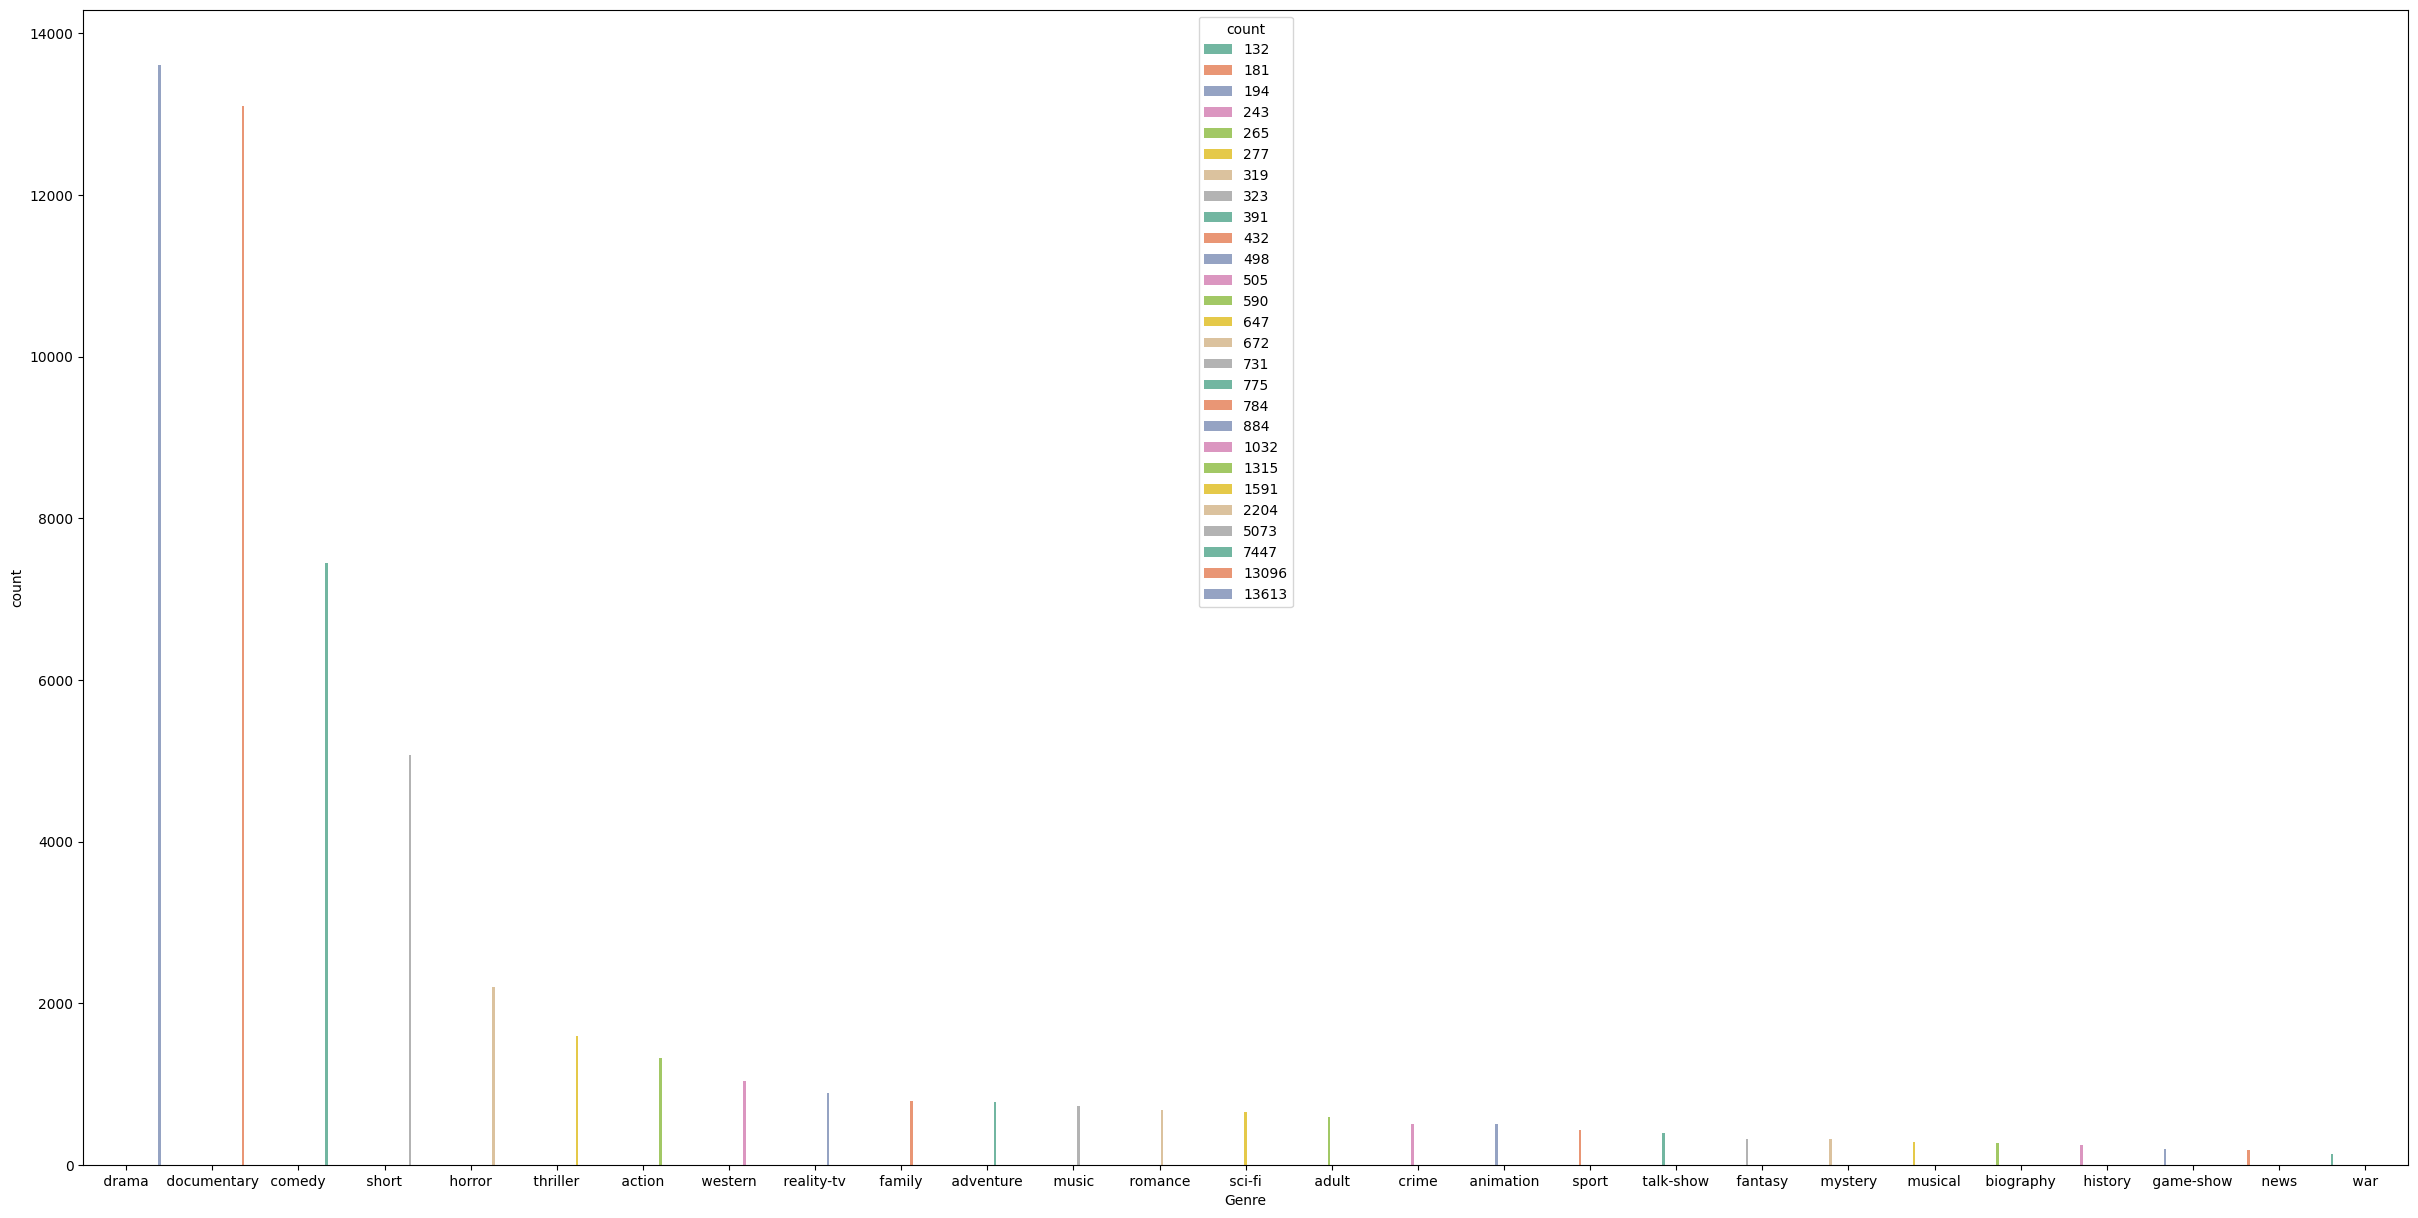

In [49]:
genres = df['Genre'].value_counts() 

plt.figure(figsize=(30,15))
sns.barplot(x=genres.index, y=genres, palette="Set2", hue=genres)
plt.title("Genres distribution", fontsize=30, c='r')
plt.xlabel("Genres", fontsize=24)
plt.ylabel("Count", fontsize=24)
plt.show()

In [50]:
vectorizer = TfidfVectorizer()
vectorizer.get_stop_words()
# Let's try seeing the tokens fetting only few plots 

plot = df['Plot'][0:2] # get first plot
type(plot)

tokens = vectorizer.fit_transform(plot)
vectorizer.get_feature_names_out()

array(['10', 'allow', 'and', 'anyone', 'approaches', 'as', 'bacon',
       'between', 'blue', 'brother', 'charm', 'childhood', 'christmas',
       'close', 'company', 'conversation', 'corn', 'courage', 'current',
       'doctor', 'einstein', 'except', 'experiences', 'fantastical',
       'few', 'friends', 'full', 'furious', 'get', 'has', 'have', 'he',
       'her', 'him', 'his', 'hospital', 'imagination', 'in', 'incestuous',
       'lady', 'learns', 'life', 'listening', 'live', 'love', 'meets',
       'murderous', 'murders', 'nobody', 'of', 'old', 'on', 'only',
       'oscar', 'parents', 'past', 'peggy', 'pink', 'pop', 'professional',
       'refuses', 'reject', 'relationship', 'rose', 'she', 'sister',
       'speak', 'stairs', 'straight', 'sweetheart', 'talking', 'tell',
       'the', 'to', 'too', 'uses', 'weeks', 'what', 'who', 'wit', 'with',
       'women', 'wrestler', 'year'], dtype=object)

In [51]:
print(vectorizer.vocabulary_)

{'listening': 42, 'in': 37, 'to': 73, 'conversation': 15, 'between': 7, 'his': 34, 'doctor': 19, 'and': 2, 'parents': 54, '10': 0, 'year': 83, 'old': 50, 'oscar': 53, 'learns': 40, 'what': 77, 'nobody': 48, 'has': 29, 'the': 72, 'courage': 17, 'tell': 71, 'him': 33, 'he': 31, 'only': 52, 'few': 24, 'weeks': 76, 'live': 43, 'furious': 27, 'refuses': 60, 'speak': 66, 'anyone': 3, 'except': 21, 'straight': 68, 'talking': 70, 'rose': 63, 'lady': 39, 'pink': 57, 'meets': 45, 'on': 51, 'hospital': 35, 'stairs': 67, 'as': 5, 'christmas': 12, 'approaches': 4, 'uses': 75, 'her': 32, 'fantastical': 23, 'experiences': 22, 'professional': 59, 'wrestler': 82, 'imagination': 36, 'wit': 79, 'charm': 10, 'allow': 1, 'life': 41, 'love': 44, 'full': 26, 'company': 14, 'of': 49, 'friends': 25, 'pop': 58, 'corn': 16, 'einstein': 20, 'bacon': 6, 'childhood': 11, 'sweetheart': 69, 'peggy': 56, 'blue': 8, 'brother': 9, 'sister': 65, 'with': 80, 'past': 55, 'incestuous': 38, 'relationship': 62, 'have': 30, 'c

In [52]:
stop_words = nltk.corpus.stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [53]:
print("Before cleaning\n-------------------")
print(plot[0])

Before cleaning
-------------------
 Listening in to a conversation between his doctor and parents, 10-year-old Oscar learns what nobody has the courage to tell him. He only has a few weeks to live. Furious, he refuses to speak to anyone except straight-talking Rose, the lady in pink he meets on the hospital stairs. As Christmas approaches, Rose uses her fantastical experiences as a professional wrestler, her imagination, wit and charm to allow Oscar to live life and love to the full, in the company of his friends Pop Corn, Einstein, Bacon and childhood sweetheart Peggy Blue.


In [54]:
print("\nAfter cleaning\n-------------------")
clean_plot = [word for word in plot[0].split() if word.lower() not in stop_words]
clean_plot = ' '.join(clean_plot)
print(clean_plot)


After cleaning
-------------------
Listening conversation doctor parents, 10-year-old Oscar learns nobody courage tell him. weeks live. Furious, refuses speak anyone except straight-talking Rose, lady pink meets hospital stairs. Christmas approaches, Rose uses fantastical experiences professional wrestler, imagination, wit charm allow Oscar live life love full, company friends Pop Corn, Einstein, Bacon childhood sweetheart Peggy Blue.


In [55]:
def clean_plot(plot):
    # first lowercase all words
    plot = plot.lower()
    # omit numbers, symbols, and all, except alphabets
    plot = re.sub(r'[^a-zA-Z\s]+', '', plot).strip()
    # remove the stopwords
    stop_words = set(stopwords.words('english'))  # You need to define stopwords
    plot = [word for word in plot.split() if word.lower() not in stop_words]
    plot = ' '.join(plot)
    # return clean plot
    return plot
    

In [56]:
df['Clean Plot'] = df['Plot'].apply(clean_plot)
df.head()

,Title,Genre,Plot,Clean Plot
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening conversation doctor parents yearold ...
1,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...
2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...
3,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...
4,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,films title refers unrecovered bodies ground z...


In [57]:
vectorizer = TfidfVectorizer()

In [58]:
X_train = vectorizer.fit_transform(df['Clean Plot']) 

In [59]:
X_train.shape

(54214, 146144)

In [60]:
y_train = df['Genre']
print(y_train.shape)
print(y_train)

(54214,)
0               drama 
1            thriller 
2               adult 
3               drama 
4               drama 
             ...      
54209          comedy 
54210          horror 
54211     documentary 
54212          comedy 
54213         history 
Name: Genre, Length: 54214, dtype: object


In [61]:
test_data = load_data("E:/test_data.txt")

In [62]:
test_data.head()

,Title,Genre,Plot
0,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",NaN
1,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",NaN
2,Off the Beaten Track (2010),One year in the life of Albin and his family ...,NaN
3,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",NaN
4,Er nu zhai (1955),Before he was known internationally as a mart...,NaN


In [72]:
test_data['Clean Plot'] = test_data['Plot'].apply(clean_plot)
test_data.head()

,Plot,Genre,Clean Plot
0,This is a sample plot.,Action,this is a sample plot
1,Another plot!,Comedy,another plot
2,,Drama,
3,12345,Sci-Fi,
4,Final plot.,Thriller,final plot


In [73]:
X_test = vectorizer.transform(test_data['Clean Plot'])
print(X_test.shape)

(5, 146144)


In [74]:
y_test = test_data['Genre']

In [75]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [77]:
y_pred = model.predict(X_test)


In [78]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy = {(accuracy*100):.2f}%")
print(classification_report(y_test, y_pred,  zero_division=1))

Accuracy = 0.00%
              precision    recall  f1-score   support

      drama        0.00      1.00      0.00       0.0
      Action       1.00      0.00      0.00       1.0
      Comedy       1.00      0.00      0.00       1.0
       Drama       1.00      0.00      0.00       1.0
      Sci-Fi       1.00      0.00      0.00       1.0
    Thriller       1.00      0.00      0.00       1.0

    accuracy                           1.00       5.0
   macro avg       0.83      0.17      0.00       5.0
weighted avg       1.00      0.00      0.00       5.0

